# Assignment 3

 In this Assignment, we will use CNN to classify digits.   
The `MNIST` database is a large database of handwritten digits that is commonly used for training various image processing systems.



## Importing TensorFlow

In [1]:
import tensorflow as tf

## Get the dataset

In [2]:
# Import the dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
# Split the dataset

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_test,y_test,test_size=0.2)

In [4]:

# Pre processing
X_train = X_train/255.0
X_test = X_test/255.0

# print(X_train,X_test)

In [5]:
Y_train.shape

(8000,)

In [6]:
Y_test.shape

(2000,)

In [7]:
from tensorflow.keras.utils import to_categorical

In [8]:
Y_train_use = to_categorical(Y_train, 10)
Y_test_use = to_categorical(Y_test,10)

In [9]:
Y_train_use.shape

(8000, 10)

In [10]:
Y_test_use.shape

(2000, 10)

In [11]:
X_test.shape

(2000, 28, 28)

In [12]:
X_test= X_test.reshape(2000,28,28,1)
X_test.shape

(2000, 28, 28, 1)

In [13]:
X_train.shape

(8000, 28, 28)

In [14]:
X_train = X_train.reshape(8000,28,28,1)
X_train.shape

(8000, 28, 28, 1)

## Visualize the dataset
Print some images with labels.

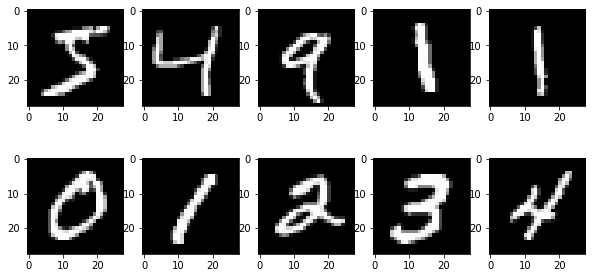

In [15]:
import matplotlib.pyplot as plt
f, axs = plt.subplots(2,5,figsize=(10,5))
# print(axs)
for i in range(2):
  for j in range(5):  
    axs[i][j].imshow(x_train[2*j + i], cmap=plt.get_cmap('gray'))

Plot statistics of the training and testing dataset  
(`x axis`: digits, `y axis`: number of samples corresponding to the digits)

In [16]:
import numpy as np
import seaborn as sns


C:\Users\bhuvn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bhuvn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bhuvn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'y_train')

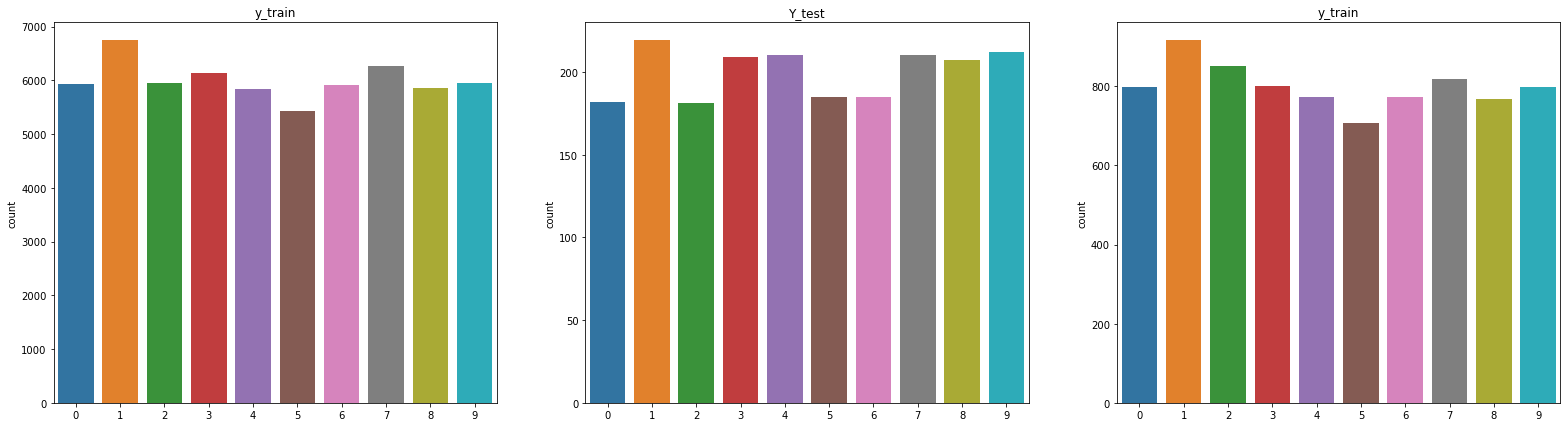

In [17]:
fig ,axs =  plt.subplots(1,3,figsize= (27,7))
sns.countplot(y_train,ax = axs[0])
axs[0].set_title("y_train")
sns.countplot(Y_test, ax = axs[1])
axs[1].set_title("Y_test")
sns.countplot(Y_train,ax = axs[2])
axs[2].set_title("y_train")

## Model

In [21]:
from tensorflow.keras.layers import Dense,MaxPool2D,Convolution2D,Flatten
from tensorflow.keras.models import Sequential

In [23]:
# model building

# You are supposed to look at some CNN architectures and add convolutional layers along with MaxPooling, specifying the kernel size, pooling size, activation 
model = Sequential()
# CONVOLUTIONAL LAYER
model.add(Convolution2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER 
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
early_stop = EarlyStopping( monitor='val_loss',patience= 3)

In [28]:
# Compile the model (add optimizers and metrics)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) 

# Fit the model on the training data (specify validation_split, read about validation if new to you)
model.fit(X_train, Y_train_use,epochs=10, validation_data=(X_test,Y_test_use),callbacks= [early_stop])


Epoch 1/10
250/250 [==============================] - 4s 14ms/step - loss: 0.1166 - accuracy: 0.9653 - val_loss: 0.1301 - val_accuracy: 0.9555
Epoch 2/10
250/250 [==============================] - 3s 13ms/step - loss: 0.0542 - accuracy: 0.9834 - val_loss: 0.0965 - val_accuracy: 0.9715
Epoch 3/10
250/250 [==============================] - 3s 13ms/step - loss: 0.0281 - accuracy: 0.9909 - val_loss: 0.1031 - val_accuracy: 0.9705
Epoch 4/10
250/250 [==============================] - 3s 13ms/step - loss: 0.0170 - accuracy: 0.9956 - val_loss: 0.0935 - val_accuracy: 0.9740
Epoch 5/10
250/250 [==============================] - 3s 12ms/step - loss: 0.0123 - accuracy: 0.9970 - val_loss: 0.0707 - val_accuracy: 0.9785
Epoch 6/10
250/250 [==============================] - 3s 13ms/step - loss: 0.0069 - accuracy: 0.9984 - val_loss: 0.1002 - val_accuracy: 0.9745
Epoch 7/10
250/250 [==============================] - 3s 12ms/step - loss: 0.0056 - accuracy: 0.9986 - val_loss: 0.0779 - val_accuracy: 0.9790

## Predict some images
Print the image along with its label (true value) and predicted value.

In [29]:
Test_Images = X_test[0:10]

1/1 [==============================] - 0s 17ms/step


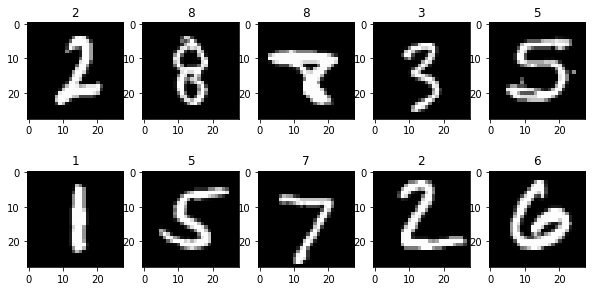

In [49]:
f, axs = plt.subplots(2,5,figsize=(10,5))
for i in range(2):
  for j in range(5):  
    axs[i][j].imshow(Test_Images[2*j + i], cmap=plt.get_cmap('gray'))
    predictions = (model.predict(Test_Images[2*j + i].reshape(1,28,28,1)) > 0.5).astype("int32")
    predictions = predictions.reshape(-1)
    label = -1
    for m in range(10):
        if predictions[m] == 1:
            label = m
    axs[i][j].set_title(str(label))
    